In [11]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import time

1. Подготовка данных

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# приведем пиксели к диапазону [0,1]
train_X, test_X = train_X / 255.0, test_X / 255.0

# добавим канал для нейронки
x_train = train_X.reshape(-1, 28 * 28)
x_test = test_X.reshape(-1, 28 * 28)

x_train, x_val, y_train, y_val = train_test_split(x_train, train_y, test_size=0.2, random_state=42)

x_val = x_val.reshape(-1, 28 * 28)


2. Классификация с использованием kNN или SVM

Точность: 0.9344
Полнота: 0.9340
F1-score: 0.9341


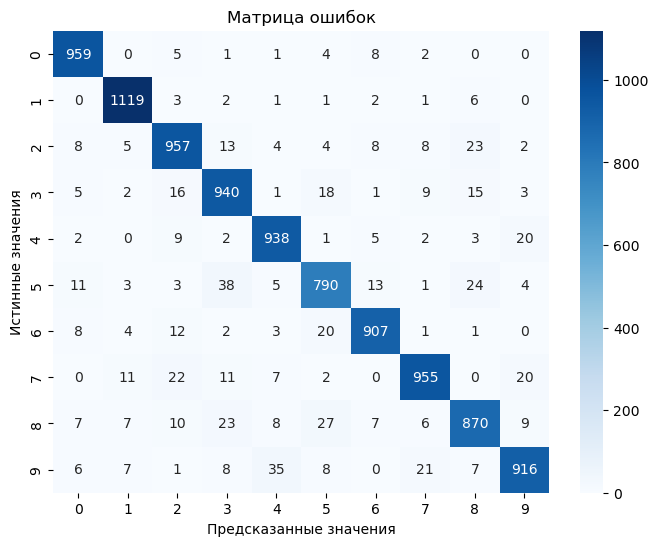

In [5]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

precision = precision_score(test_y, y_pred, average='macro')
recall = recall_score(test_y, y_pred, average='macro')
f1 = f1_score(test_y, y_pred, average='macro')

print(f'Точность: {precision:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

conf_matrix = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')

plt.show()


3. Построение и обучение нейронной сети

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.4659 - val_accuracy: 0.9612 - val_loss: 0.1256
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9643 - loss: 0.1188 - val_accuracy: 0.9688 - val_loss: 0.0987
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0778 - val_accuracy: 0.9727 - val_loss: 0.0850
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9832 - loss: 0.0565 - val_accuracy: 0.9707 - val_loss: 0.0903
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9701 - val_loss: 0.1004
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0334 - val_accuracy: 0.9740 - val_loss: 0.0882
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9763 - val_loss: 0.0859
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.9935 - loss: 0.020

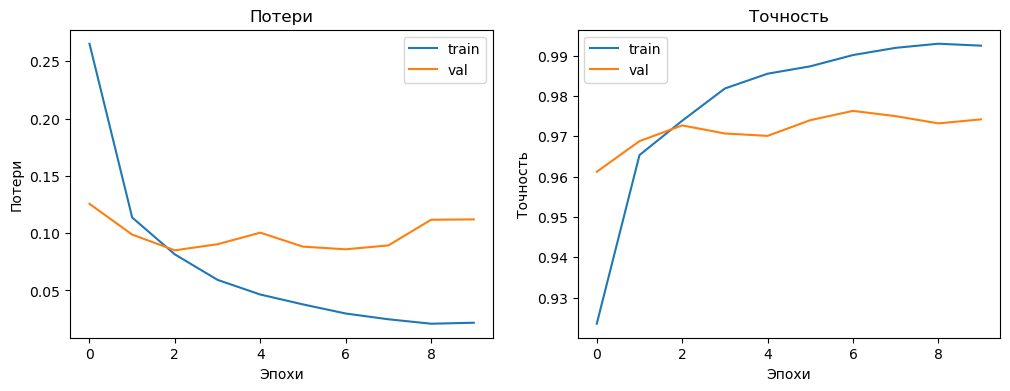

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(test_y, 10)

mlp = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = mlp.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность')

plt.show()

4. Сравнительный анализ моделей

In [15]:
# сравним по точности
accuracy = accuracy_score(test_y, y_pred)
test_loss, test_acc = mlp.evaluate(x_test, y_test, verbose=0)

print(f'Точность (acc) SVM: {accuracy:.4f}')
print(f'Точность (acc) MLP: {test_acc:.4f}')

y_pred_mlp = mlp.predict(x_test)
y_pred_mlp = np.argmax(y_pred_mlp, axis=1)

precision_mlp = precision_score(test_y, y_pred_mlp, average='macro')
recall_mlp = recall_score(test_y, y_pred_mlp, average='macro')
f1_mlp = f1_score(test_y, y_pred_mlp, average='macro')

print(f'Точность MLP: {precision_mlp:.4f}')
print(f'Полнота MLP: {recall_mlp:.4f}')
print(f'F1-score MLP: {f1_mlp:.4f}')


Точность (acc) SVM: 0.9351
Точность (acc) MLP: 0.9742
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
Точность MLP: 0.9741
Полнота MLP: 0.9739
F1-score MLP: 0.9739
